<a href="https://colab.research.google.com/github/pandupuncak/II4035-PersonalNotebooks/blob/main/18219047_Covid_Vaccination_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initializing Notebook

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib as plt
print('matplotlib: {}'.format(plt.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import glob
#print('glob: {}'.format(glob.__version__))
import os

import seaborn as sns

import io

import json

import pickle

Python: 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.5
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [ ]:
from google.colab import files
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn import preprocessing
from re import sub
from pathlib import Path
from decimal import Decimal

In [ ]:
! pip install kaggle

In [ ]:
#Upload kaggle.json file for API authentication
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
#Downloading the Dataset to Development Environment
! kaggle datasets download -d gpreda/covid-world-vaccination-progress
! unzip covid-world-vaccination-progress

covid-world-vaccination-progress.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid-world-vaccination-progress.zip
replace country_vaccinations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace country_vaccinations_by_manufacturer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
! kaggle datasets download josephassaker/covid19-global-dataset
! unzip covid19-global-dataset

  0% 0.00/1.63M [00:00<?, ?B/s]
100% 1.63M/1.63M [00:00<00:00, 26.8MB/s]
Archive:  covid19-global-dataset.zip
  inflating: worldometer_coronavirus_daily_data.csv  
  inflating: worldometer_coronavirus_summary_data.csv  


In [ ]:
#Main Dataset
df1 = pd.read_csv("country_vaccinations.csv")
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
#Alternative Dataset
df2 = pd.read_csv("country_vaccinations_by_manufacturer.csv")
df2.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Novavax,0
3,Austria,2021-01-08,Oxford/AstraZeneca,0
4,Austria,2021-01-08,Pfizer/BioNTech,31641


In [ ]:
#Added Dataset
summary_df= pd.read_csv("worldometer_coronavirus_summary_data.csv")
summary_df.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,158275,7367.0,145750.0,5158.0,1124.0,3932,183.0,826810.0,20541.0,40250878
1,Albania,Europe,213257,3228.0,202077.0,7952.0,23.0,74227,1124.0,1495002.0,520354.0,2873049
2,Algeria,Africa,220415,6310.0,151347.0,62758.0,34.0,4893,140.0,230861.0,5125.0,45046063
3,Andorra,Europe,25289,141.0,21511.0,3637.0,31.0,326512,1820.0,249838.0,3225714.0,77452
4,Angola,Africa,86636,1789.0,67477.0,17370.0,7.0,2518,52.0,1296669.0,37686.0,34407243


df1 = Vaccination Data
df2 = Vaccination Data per Manufacturer

# Statistik Data

In [ ]:
df1.shape

(81976, 15)

In [ ]:
#Describing all numerical data
df1.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.187300e+04,3.963800e+04,3.711900e+04,3.403300e+04,8.169700e+04,41873.000000,39638.000000,37119.000000,81697.000000
mean,4.266144e+07,1.664001e+07,1.306131e+07,2.725470e+05,1.343912e+05,76.609732,39.746849,34.202816,3338.877535
std,2.125270e+08,6.650941e+07,5.247098e+07,1.227710e+06,7.842023e+05,65.730864,29.015166,27.998302,3970.621259
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.992060e+05,3.329422e+05,2.267500e+05,5.008000e+03,9.550000e+02,14.580000,10.500000,6.325000,685.000000
50%,3.351838e+06,2.056976e+06,1.585259e+06,2.571100e+04,7.660000e+03,62.920000,39.300000,29.430000,2161.000000
75%,1.598427e+07,8.604462e+06,6.848700e+06,1.261760e+05,4.518000e+04,128.130000,66.750000,60.070000,4800.000000
max,3.165486e+09,1.269302e+09,1.234540e+09,2.474100e+07,2.242429e+07,336.160000,124.650000,121.530000,117497.000000


In [ ]:
#Showing variance of all numerical data
df1.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


total_vaccinations                     4.516774e+16
people_vaccinated                      4.423502e+15
people_fully_vaccinated                2.753204e+15
daily_vaccinations_raw                 1.507271e+12
daily_vaccinations                     6.149733e+11
total_vaccinations_per_hundred         4.320546e+03
people_vaccinated_per_hundred          8.418799e+02
people_fully_vaccinated_per_hundred    7.839049e+02
daily_vaccinations_per_million         1.576583e+07
dtype: float64

In [ ]:
#Describing all categorical data
df1.describe(include=['object'])

,country,iso_code,date,vaccines,source_name,source_website
count,81976,81976,81976,81976,81976,81976
unique,223,223,461,80,81,126
top,Norway,NOR,2021-08-28,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/
freq,460,460,220,7680,24684,18538


In [ ]:
#Describing all data
df1.describe(include= 'all')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
count,81976,81976,81976,4.187300e+04,3.963800e+04,3.711900e+04,3.403300e+04,8.169700e+04,41873.000000,39638.000000,37119.000000,81697.000000,81976,81976,81976
unique,223,223,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,81,126
top,Norway,NOR,2021-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/
freq,460,460,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7680,24684,18538
mean,NaN,NaN,NaN,4.266144e+07,1.664001e+07,1.306131e+07,2.725470e+05,1.343912e+05,76.609732,39.746849,34.202816,3338.877535,NaN,NaN,NaN
std,NaN,NaN,NaN,2.125270e+08,6.650941e+07,5.247098e+07,1.227710e+06,7.842023e+05,65.730864,29.015166,27.998302,3970.621259,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.992060e+05,3.329422e+05,2.267500e+05,5.008000e+03,9.550000e+02,14.580000,10.500000,6.325000,685.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.351838e+06,2.056976e+06,1.585259e+06,2.571100e+04,7.660000e+03,62.920000,39.300000,29.430000,2161.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.598427e+07,8.604462e+06,6.848700e+06,1.261760e+05,4.518000e+04,128.130000,66.750000,60.070000,4800.000000,NaN,NaN,NaN


In [ ]:
#Counting how many null values in each column
df1.isna().sum(axis = 0)

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     40103
people_vaccinated                      42338
people_fully_vaccinated                44857
daily_vaccinations_raw                 47943
daily_vaccinations                       279
total_vaccinations_per_hundred         40103
people_vaccinated_per_hundred          42338
people_fully_vaccinated_per_hundred    44857
daily_vaccinations_per_million           279
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
#Calculating how many values are not null in each column
df1.count()

country                                81976
iso_code                               81976
date                                   81976
total_vaccinations                     41873
people_vaccinated                      39638
people_fully_vaccinated                37119
daily_vaccinations_raw                 34033
daily_vaccinations                     81697
total_vaccinations_per_hundred         41873
people_vaccinated_per_hundred          39638
people_fully_vaccinated_per_hundred    37119
daily_vaccinations_per_million         81697
vaccines                               81976
source_name                            81976
source_website                         81976
dtype: int64

In [ ]:
#Calculating correlation between each feature
df1.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.985068,0.988106,0.671707,0.705861,0.169332,0.182285,0.136584,0.045178
people_vaccinated,0.985068,1.000000,0.953320,0.783687,0.863533,0.120349,0.155073,0.095478,0.036606
people_fully_vaccinated,0.988106,0.953320,1.000000,0.675829,0.740289,0.159418,0.188407,0.157461,0.022978
daily_vaccinations_raw,0.671707,0.783687,0.675829,1.000000,0.965843,0.034124,0.044722,-0.025656,0.127993
daily_vaccinations,0.705861,0.863533,0.740289,0.965843,1.000000,0.046781,0.066061,-0.011195,0.133271
total_vaccinations_per_hundred,0.169332,0.120349,0.159418,0.034124,0.046781,1.000000,0.967340,0.976338,0.224382
people_vaccinated_per_hundred,0.182285,0.155073,0.188407,0.044722,0.066061,0.967340,1.000000,0.962296,0.308167
people_fully_vaccinated_per_hundred,0.136584,0.095478,0.157461,-0.025656,-0.011195,0.976338,0.962296,1.000000,0.140229
daily_vaccinations_per_million,0.045178,0.036606,0.022978,0.127993,0.133271,0.224382,0.308167,0.140229,1.000000


In [ ]:
#Calculating covariance between each feature
df1.cov()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,4.516774e+16,7.590750e+15,6.643888e+15,1.934830e+14,1.624743e+14,2.365496e+09,6.136825e+08,4.910137e+08,3.894925e+10
people_vaccinated,7.590750e+15,4.423502e+15,3.217119e+15,3.971359e+13,3.349665e+13,5.229696e+08,2.992579e+08,1.856674e+08,9.982381e+09
people_fully_vaccinated,6.643888e+15,3.217119e+15,2.753204e+15,2.797722e+13,2.374708e+13,5.416084e+08,2.595254e+08,2.313250e+08,4.547345e+09
daily_vaccinations_raw,1.934830e+14,3.971359e+13,2.797722e+13,1.507271e+12,1.407538e+12,2.772163e+06,8.977483e+05,-5.217782e+05,6.367661e+08
daily_vaccinations,1.624743e+14,3.349665e+13,2.374708e+13,1.407538e+12,6.149733e+11,3.319092e+06,1.112535e+06,-1.915090e+05,4.149744e+08
total_vaccinations_per_hundred,2.365496e+09,5.229696e+08,5.416084e+08,2.772163e+06,3.319092e+06,4.320546e+03,1.836475e+03,1.773467e+03,5.962711e+04
people_vaccinated_per_hundred,6.136825e+08,2.992579e+08,2.595254e+08,8.977483e+05,1.112535e+06,1.836475e+03,8.418799e+02,7.638284e+02,3.648483e+04
people_fully_vaccinated_per_hundred,4.910137e+08,1.856674e+08,2.313250e+08,-5.217782e+05,-1.915090e+05,1.773467e+03,7.638284e+02,7.839049e+02,1.479990e+04
daily_vaccinations_per_million,3.894925e+10,9.982381e+09,4.547345e+09,6.367661e+08,4.149744e+08,5.962711e+04,3.648483e+04,1.479990e+04,1.576583e+07


A positive and greater covariance number means a more direct relationship between two variables.

In [ ]:
#Calculating skewness of each feature
df1.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


total_vaccinations                     10.083562
people_vaccinated                      10.544477
people_fully_vaccinated                12.757408
daily_vaccinations_raw                 10.226926
daily_vaccinations                     15.213272
total_vaccinations_per_hundred          0.610424
people_vaccinated_per_hundred           0.112366
people_fully_vaccinated_per_hundred     0.337475
daily_vaccinations_per_million          4.807675
dtype: float64

A positive skew score means that the mean is greater than the median, which means that the data/column is imbalanced. The same thing works too for negative skew scores.

In [ ]:
#Calculating kurtosis of each feature
df1.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


total_vaccinations                     113.999288
people_vaccinated                      134.355753
people_fully_vaccinated                214.489192
daily_vaccinations_raw                 128.746817
daily_vaccinations                     292.379746
total_vaccinations_per_hundred          -0.540612
people_vaccinated_per_hundred           -1.297540
people_fully_vaccinated_per_hundred     -1.155866
daily_vaccinations_per_million          67.806287
dtype: float64

A high level of kurtosis means there is a high chance that the extreme points of a skewed data set would have a larger difference than its normal values.

In [ ]:
#List of all categorical columns
categoricals = df1.select_dtypes(include=['object']).columns.tolist()
#List of all numerical columns
numericals = df1.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
#Describe all categorical columns
for column in categoricals:
  print(df1[column].describe())

count      81976
unique       223
top       Norway
freq         460
Name: country, dtype: object
count     81976
unique      223
top         NOR
freq        460
Name: iso_code, dtype: object
count          81976
unique           461
top       2021-08-28
freq             220
Name: date, dtype: object
count                                                 81976
unique                                                   80
top       Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...
freq                                                   7680
Name: vaccines, dtype: object
count                         81976
unique                           81
top       World Health Organization
freq                          24684
Name: source_name, dtype: object
count                        81976
unique                         126
top       https://covid19.who.int/
freq                         18538
Name: source_website, dtype: object


In [ ]:
df1.sample(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
56114,Oman,OMN,2021-12-01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",World Health Organization,https://covid19.who.int/
22853,Equatorial Guinea,GNQ,2021-03-29,12155.0,9748.0,2407.0,NaN,430.0,0.84,0.67,0.17,297.0,Sinopharm/Beijing,Ministry of Health,https://guineasalud.org/estadisticas/
49631,Morocco,MAR,2021-04-02,8171651.0,4331082.0,3840569.0,75197.0,92338.0,21.88,11.60,10.28,2473.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
48755,Mongolia,MNG,2022-01-19,5416594.0,2268377.0,2168827.0,4853.0,5135.0,162.70,68.13,65.14,1542.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health via ikon.mn,https://ikon.mn/
1351,Andorra,AND,2021-07-11,NaN,NaN,NaN,NaN,121.0,NaN,NaN,NaN,1564.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/


In [ ]:
#Verifikasi tipe data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81976 entries, 0 to 81975
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              81976 non-null  object 
 1   iso_code                             81976 non-null  object 
 2   date                                 81976 non-null  object 
 3   total_vaccinations                   41873 non-null  float64
 4   people_vaccinated                    39638 non-null  float64
 5   people_fully_vaccinated              37119 non-null  float64
 6   daily_vaccinations_raw               34033 non-null  float64
 7   daily_vaccinations                   81697 non-null  float64
 8   total_vaccinations_per_hundred       41873 non-null  float64
 9   people_vaccinated_per_hundred        39638 non-null  float64
 10  people_fully_vaccinated_per_hundred  37119 non-null  float64
 11  daily_vaccinations_per_milli

# Penanganan Null Value

In [ ]:
#Counting how many null values in each column
df1.isna().sum(axis = 0)

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     40103
people_vaccinated                      42338
people_fully_vaccinated                44857
daily_vaccinations_raw                 47943
daily_vaccinations                       279
total_vaccinations_per_hundred         40103
people_vaccinated_per_hundred          42338
people_fully_vaccinated_per_hundred    44857
daily_vaccinations_per_million           279
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Melihat dari pendeskripsian kolom-kolom yang ada di dalam dataset di atas, dapat dilihat bahwa ada sekitar 9 kolom yang memiliki banyak nilai NaN atau Null. Maka dari itu perlu ditentukan penanganan bagi mereka bagaimana.

In [ ]:
df1.sample(axis='rows')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
81161,Yemen,YEM,2021-11-21,NaN,NaN,NaN,NaN,1926.0,NaN,NaN,NaN,63.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/


Penanganan pertama adalah dengan secara sederhana menghapus seluruh baris yang beratribut NaN

In [ ]:
df1_nonan = df1.dropna()

In [ ]:
df1_nonan

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
417,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
499,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
df1.loc[df1['country'] == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Afghanistan,AFG,2022-03-02,NaN,NaN,NaN,NaN,13825.0,NaN,NaN,NaN,347.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
374,Afghanistan,AFG,2022-03-03,NaN,NaN,NaN,NaN,12578.0,NaN,NaN,NaN,316.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
375,Afghanistan,AFG,2022-03-04,NaN,NaN,NaN,NaN,11332.0,NaN,NaN,NaN,284.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
376,Afghanistan,AFG,2022-03-05,NaN,NaN,NaN,NaN,10086.0,NaN,NaN,NaN,253.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [ ]:
df1_nonan[df1_nonan['country'] == "Afghanistan"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,5081064.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Tetapi seperti dapat dilihat di atas, hal ini akan menyebabkan banyaknya data yang terhapus dari suatu dataset. Maka dari itu perlu cara yang lebih efektif dalam menangani nilai NaN/Null dari dataset di atas.Langkah pertama yang akan diambil berdasar pada salah satu query di atas yaitu kolom 'daily_vaccinations'

In [ ]:
#Melihat karakteristik row dengan data 'daily_vaccinations' = 0.0
df1[(df1['daily_vaccinations'].isna())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
378,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
794,Algeria,DZA,2021-01-29,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
1182,Algeria,DZA,2022-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
1183,Algeria,DZA,2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://africacdc.org/covid-19-vaccination/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80201,Wales,OWID_WLS,2021-01-10,86118.0,86039.0,79.0,NaN,NaN,2.72,2.71,0.0,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
80622,Wallis and Futuna,WLF,2021-03-23,1286.0,1286.0,NaN,NaN,NaN,11.59,11.59,NaN,NaN,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
80965,Yemen,YEM,2021-05-09,18555.0,18555.0,NaN,NaN,NaN,0.06,0.06,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/
81267,Zambia,ZMB,2021-04-14,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


Berdasarkan query di atas, maka dapat dilihat bahwa row-row yang memiliki nilai 'daily_vaccinations' = NaN cenderung memiliki data NaN pula yang banyak di kolom-kolom lainnya. Dengan asumsi bahwa ini berarti data belum valid, maka data tersebut dapat di drop.

In [ ]:
df1_alt = df1.drop(df1[df1.daily_vaccinations.isna()].index)
df1_alt

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Asumsi kedua yang akan digunakan adalah bahwa data total vaksinasi seharusnya selalu lengkap, karena ia merupakan data kumulatif dari seluruh data-data sebelumnya. Yang utamanya ingin dilihat dari dataset ini juga adalah data-data total_vaccinations yang terjadi, sehingga data dengan kolom 'total_vaccinations' == NaN tidak dapat dikalkulasikan pula. Maka dari itu, diasumsikan bahwa data dengan total_vaccinations == NaN adalah data yang korup.

In [ ]:
df1_alt = df1_alt.drop(df1_alt[df1_alt.total_vaccinations.isna()].index)
df1_alt

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.30,0.30,NaN,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.60,0.60,NaN,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,NaN,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [ ]:
#Hitung kembali data-data yang masih memiliki nilai NaN
df1_alt.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

Terakhir, dengan asumsi bahwa seluruh data yang sekarang diperhitungkan sudah valid, maka kita buat asumsi ketiga yaitu data-data dengan nilai NaN yang tersisa adalah data yang memang saat tercatat mereka tidak mengalami penambahan. Maka dari itu, nilai dari data dengan NaN yang tersisa adalah 0.

In [ ]:
df1_alt = df1_alt.fillna(0)

In [ ]:
#Hitung kembali data-data yang masih memiliki nilai NaN
df1_alt.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
#Mengganti dataset asli dengan dataset alternatif
df1 = df1_alt
df1.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

# Penanganan Imbalanced Data

In [ ]:
df1['country'].value_counts()

Norway                             459
United States                      449
Latvia                             448
Canada                             445
Israel                             443
                                  ... 
Niue                                 4
Pitcairn                             4
Tokelau                              3
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: country, Length: 223, dtype: int64

Dalam kasus ini, sebelum menentukan kolom mana yang memiliki imbalanced data, kita perlu melihat terlebih dahulu distribusi data dalam dataset serta menentukan juga apa target yang ingin kita cari. Dalam kasus ini, misal yang ingin kita cari adalah seluruh data terkait Swedia (Sweden) lalu membandingkannya dengan data tetangganya, Norwegia (Norway).

In [ ]:
SwedenCount = (df1['country'].values == 'Sweden').sum()
NorwayCount = (df1['country'].values == 'Norway').sum()
print("Swedia = ", SwedenCount)
print("Norwegia = ", NorwayCount)
print("Sweden : Norway")
print(SwedenCount/(SwedenCount + NorwayCount), " : ", NorwayCount/(SwedenCount + NorwayCount))
#Saved code to untruncate displayed results
#pd.set_option("display.max_rows", 999)
#pd.reset_option("display.max_rows")
#df1['source_name'].value_counts()

Swedia =  62
Norwegia =  459
Sweden : Norway
0.11900191938579655  :  0.8809980806142035


Dapat dilihat bahwa perbandingannya sangat jauh yaitu sekitar 1 : 8. Imbalanced data ini dapat mengakibatkan performa algoritma klasifikasi yang lebih buruk pada kelas minor (dalam kasus ini Swedia). Maka dari itu perlu ditangani. Metode pertama untuk menanganinya adalah Undersampling.

## Undersampling

In [ ]:
#Sampling from Bigger Class
Sweden= df1[df1['country'] == 'Sweden']
Norway= df1[df1['country'] == 'Norway']
print("Sweden Count = ", Sweden.shape[0])
print("Norway Count = ", Norway.shape[0])
print(" ")
print("After undersampling")

#Ambil sample sejumlah kelas minor secara acak
Norway_under = df1.sample(Sweden.shape[0])
print("Sweden Count = ", Sweden.shape[0])
print("Norway Count = ", Norway_under.shape[0])

Sweden Count =  62
Norway Count =  459
 
After undersampling
Sweden Count =  62
Norway Count =  62


Maka dapat dilihat sampel Swedia dan Norwegia memiliki jumlah yang sama, yaitu 62, dengan sampel Norwegia yang banyak dikurangi hingga 62.

## Oversampling

In [ ]:
#Import
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
sample_data = df1[(df1['country'] == 'Sweden') | (df1['country'] == 'Norway')]

label = LabelEncoder()
sample_data['country'] = label.fit_transform(sample_data['country'])
sample_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
55317,0,NOR,2020-12-03,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
55318,0,NOR,2020-12-04,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
55319,0,NOR,2020-12-05,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
55320,0,NOR,2020-12-06,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
55321,0,NOR,2020-12-07,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Pfizer/BioNTech",Norwegian Institute of Public Health,https://github.com/folkehelseinstituttet/surve...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71389,1,SWE,2022-02-20,20351364.0,7785906.0,7561931.0,0.0,28470.0,200.31,76.63,74.43,2802.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Public Health Agency of Sweden,https://fohm.se/smittskydd-beredskap/utbrott/a...
71398,1,SWE,2022-03-01,20479302.0,7805996.0,7588257.0,0.0,14215.0,201.56,76.83,74.69,1399.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Public Health Agency of Sweden,https://fohm.se/smittskydd-beredskap/utbrott/a...
71399,1,SWE,2022-03-02,20496448.0,7806723.0,7590312.0,17146.0,14634.0,201.73,76.84,74.71,1440.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Public Health Agency of Sweden,https://fohm.se/smittskydd-beredskap/utbrott/a...
71400,1,SWE,2022-03-03,20593147.0,7807498.0,7591681.0,96699.0,26417.0,202.69,76.84,74.72,2600.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Public Health Agency of Sweden,https://fohm.se/smittskydd-beredskap/utbrott/a...


In [ ]:
# X_train, X_test, y_train_full, y_test_full = train_test_split(Norway, Sweden, test_size=0.20, random_state=66)
feature = sample_data.iloc[:, [0,3]]
target = sample_data.iloc[:,0]
sample_data.columns.values

smote = SMOTE()
X_sm,Y_sm = smote.fit_resample(feature,target)
print("Sweden Count = ", Y_sm.shape)
print("Norway Count = ", X_sm.shape)

pd.value_counts(Y_sm)

Sweden Count =  (918,)
Norway Count =  (918, 2)


0    459
1    459
Name: country, dtype: int64

Maka dapat dilihat sampel Swedia dan Norwegia memiliki jumlah yang sama, yaitu 459, dengan sampel Swedia yang sedikit ditambah oleh SMOTE menjadi 459.

# Manipulasi Kolom

In [ ]:
df1.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


Ada banyak transformasi yang dapat dilakukan untuk menarik insight lebih dari dataset di atas. Yang pertama dapat dilakukan adalah dengan menghitung berapa persentase pertumbuhan orang yang divaksinasi per-harinya ketimbang dengan total orang yang sudah divaksinasi. Cara menghitungnya adalah dengan menambahkan kolom "Rate_of_Growth" yang isinya adalah kalkulasi 'daily_vaccinations' dibanding 'total_vaccination'.

In [ ]:
df1['Rate_of_Growth'] = df1['daily_vaccinations'] / df1['total_vaccinations']
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594


Penambahan kolom lainnya yang dapat memudahkan kategorisasi data kedepannya adalah dengan penambahan kolom tanggal, bulan, dan tahun, yang berbasis dari kolom 'date'

In [ ]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707,2021
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000,2021
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000,2021
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333,2021
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001124,2022
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001085,2022
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001066,2022
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001010,2022


In [ ]:
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707,2021,2
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000,2021,3
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000,2021,4
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333,2021,4
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001124,2022,3
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001085,2022,3
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001066,2022,3
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001010,2022,3


In [ ]:
df1['day'] = pd.DatetimeIndex(df1['date']).day
df1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707,2021,2,28
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000,2021,3,16
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000,2021,4,7
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333,2021,4,22
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594,2021,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001124,2022,3,3
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001085,2022,3,4
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001066,2022,3,5
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001010,2022,3,6


In [ ]:
summary_df

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,158275,7367.0,145750.0,5158.0,1124.0,3932,183.0,826810.0,20541.0,40250878
1,Albania,Europe,213257,3228.0,202077.0,7952.0,23.0,74227,1124.0,1495002.0,520354.0,2873049
2,Algeria,Africa,220415,6310.0,151347.0,62758.0,34.0,4893,140.0,230861.0,5125.0,45046063
3,Andorra,Europe,25289,141.0,21511.0,3637.0,31.0,326512,1820.0,249838.0,3225714.0,77452
4,Angola,Africa,86636,1789.0,67477.0,17370.0,7.0,2518,52.0,1296669.0,37686.0,34407243
...,...,...,...,...,...,...,...,...,...,...,...,...
216,Wallis And Futuna Islands,Australia/Oceania,454,7.0,438.0,9.0,NaN,41495,640.0,20508.0,1874417.0,10941
217,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,619489
218,Yemen,Asia,10152,1986.0,7043.0,1123.0,23.0,329,64.0,265253.0,8607.0,30816951
219,Zambia,Africa,274087,3782.0,236878.0,33427.0,317.0,14305,197.0,3024431.0,157850.0,19160213


Manipulasi Kolom/Feature Generation yang terakhir adalah dengan menambahkan kolom benua atau 'Continent' ke dalam dataset, dengan memanfaatkan dataset lainnya yang sudah memiliki pasangan negara dan benua. 

In [ ]:
df1['continent'] = df1.country.map(summary_df.set_index('country')['continent'].to_dict())
df1

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707,2021,2,28,Asia
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000,2021,3,16,Asia
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000,2021,4,7,Asia
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333,2021,4,22,Asia
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594,2021,5,11,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81971,Zimbabwe,ZWE,2022-03-03,7921113.0,4372925.0,3406482.0,10373.0,8903.0,52.48,28.97,22.57,590.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001124,2022,3,3,Africa
81972,Zimbabwe,ZWE,2022-03-04,7930621.0,4374896.0,3408609.0,9508.0,8603.0,52.55,28.99,22.59,570.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001085,2022,3,4,Africa
81973,Zimbabwe,ZWE,2022-03-05,7936145.0,4377373.0,3410340.0,5524.0,8458.0,52.58,29.00,22.60,560.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001066,2022,3,5,Africa
81974,Zimbabwe,ZWE,2022-03-06,7938362.0,4378029.0,3410960.0,2217.0,8017.0,52.60,29.01,22.60,531.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,0.001010,2022,3,6,Africa


# Operasi Query

In [ ]:
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707,2021,2,28,Asia
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000,2021,3,16,Asia
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000,2021,4,7,Asia
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333,2021,4,22,Asia
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594,2021,5,11,Asia


Berikut ini adalah query-query untuk mengetahui informasi dari dataset yang diinginkan berikut ini:


Data Negara Indonesia

In [ ]:
df1[df1['country'] == 'Indonesia']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
33910,Indonesia,IDN,2021-01-22,132000.0,132000.0,0.0,0.0,13200.0,0.05,0.05,0.00,48.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.100000,2021,1,22,Asia
33912,Indonesia,IDN,2021-01-24,149242.0,149242.0,0.0,0.0,11892.0,0.05,0.05,0.00,43.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.079683,2021,1,24,Asia
33913,Indonesia,IDN,2021-01-25,161959.0,161959.0,0.0,12717.0,11823.0,0.06,0.06,0.00,43.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.073000,2021,1,25,Asia
33914,Indonesia,IDN,2021-01-26,245685.0,245685.0,0.0,83726.0,21898.0,0.09,0.09,0.00,79.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.089130,2021,1,26,Asia
33915,Indonesia,IDN,2021-01-27,308003.0,308003.0,0.0,62318.0,28915.0,0.11,0.11,0.00,105.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.093879,2021,1,27,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34250,Indonesia,IDN,2021-12-28,269370107.0,157804805.0,111565302.0,1562465.0,1295368.0,97.47,57.10,40.37,4687.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004809,2021,12,28,Asia
34251,Indonesia,IDN,2021-12-29,271240030.0,158962242.0,112277788.0,1869923.0,1313756.0,98.15,57.52,40.63,4754.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004844,2021,12,29,Asia
34252,Indonesia,IDN,2021-12-30,273016811.0,160012443.0,113004368.0,1776781.0,1323661.0,98.79,57.90,40.89,4790.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004848,2021,12,30,Asia
34253,Indonesia,IDN,2021-12-31,274749184.0,161082857.0,113666327.0,1732373.0,1339844.0,99.42,58.29,41.13,4848.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004877,2021,12,31,Asia


Negara dengan Vaksinasi Total di atas 100 juta orang

In [ ]:
(df1['country'][df1['total_vaccinations'] > 100000000]).unique()

array(['Bangladesh', 'Brazil', 'China', 'England', 'France', 'Germany',
       'India', 'Indonesia', 'Iran', 'Italy', 'Japan', 'Mexico',
       'Pakistan', 'Philippines', 'Russia', 'South Korea', 'Thailand',
       'Turkey', 'United Kingdom', 'United States', 'Vietnam'],
      dtype=object)

In [ ]:
(df1[df1['total_vaccinations'] > 100000000])

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
6110,Bangladesh,BGD,2021-12-04,101198354.0,63639683.0,37558671.0,0.0,1058814.0,60.85,38.27,22.58,6367.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,0.010463,2021,12,4,Asia
6111,Bangladesh,BGD,2021-12-05,102108505.0,64284262.0,37824243.0,910151.0,1188813.0,61.40,38.65,22.74,7148.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,0.011643,2021,12,5,Asia
6112,Bangladesh,BGD,2021-12-06,103091820.0,64958515.0,38133305.0,983315.0,1054890.0,61.99,39.06,22.93,6343.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,0.010233,2021,12,6,Asia
6113,Bangladesh,BGD,2021-12-07,103668706.0,65176140.0,38492566.0,576886.0,1033409.0,62.34,39.19,23.15,6214.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,0.009968,2021,12,7,Asia
6114,Bangladesh,BGD,2021-12-08,105138474.0,65484710.0,39653764.0,1469768.0,938908.0,63.22,39.38,23.84,5646.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Directorate General of Health Services,http://103.247.238.92/webportal/pages/covid19-...,0.008930,2021,12,8,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80194,Vietnam,VNM,2022-02-28,194970502.0,79373871.0,77052498.0,1345407.0,425303.0,198.61,80.85,78.49,4332.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://suckhoedoisong.vn/ngay-7-3-so-mac-moi-...,0.002181,2022,2,28,NaN
80195,Vietnam,VNM,2022-03-01,195308572.0,79381128.0,77071397.0,338070.0,415014.0,198.95,80.86,78.51,4228.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://suckhoedoisong.vn/ngay-7-3-so-mac-moi-...,0.002125,2022,3,1,NaN
80196,Vietnam,VNM,2022-03-02,195672969.0,79416167.0,77095637.0,364397.0,427949.0,199.32,80.90,78.53,4359.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://suckhoedoisong.vn/ngay-7-3-so-mac-moi-...,0.002187,2022,3,2,NaN
80199,Vietnam,VNM,2022-03-05,197571534.0,79598596.0,77419867.0,0.0,594749.0,201.26,81.08,78.86,6058.0,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://suckhoedoisong.vn/ngay-7-3-so-mac-moi-...,0.003010,2022,3,5,NaN


Data Vaksinasi Indonesia Bulan November 2021

In [ ]:
df1[(df1['month'] == 11) & (df1['country'] == 'Indonesia') & (df1['year'] == 2021)]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
34193,Indonesia,IDN,2021-11-01,194141514.0,120052587.0,74088927.0,780283.0,1779018.0,70.25,43.44,26.81,6437.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.009164,2021,11,1,Asia
34194,Indonesia,IDN,2021-11-02,195693514.0,120887847.0,74805667.0,1552000.0,1745184.0,70.81,43.74,27.07,6315.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.008918,2021,11,2,Asia
34195,Indonesia,IDN,2021-11-03,197804943.0,121975753.0,75829190.0,2111429.0,1741257.0,71.57,44.14,27.44,6301.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.008803,2021,11,3,Asia
34196,Indonesia,IDN,2021-11-04,199539846.0,122852096.0,76687750.0,1734903.0,1688528.0,72.20,44.45,27.75,6110.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.008462,2021,11,4,Asia
34197,Indonesia,IDN,2021-11-05,201512037.0,123824199.0,77687838.0,1972191.0,1680264.0,72.92,44.81,28.11,6080.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.008338,2021,11,5,Asia
34198,Indonesia,IDN,2021-11-06,202270239.0,124156167.0,78114072.0,758202.0,1403962.0,73.19,44.93,28.27,5080.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.006941,2021,11,6,Asia
34199,Indonesia,IDN,2021-11-07,204100126.0,125105963.0,78994163.0,1829887.0,1534128.0,73.85,45.27,28.58,5551.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.007517,2021,11,7,Asia
34200,Indonesia,IDN,2021-11-08,204606962.0,125394487.0,79212475.0,506836.0,1495064.0,74.04,45.37,28.66,5410.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.007307,2021,11,8,Asia
34201,Indonesia,IDN,2021-11-09,206529810.0,126459285.0,80070525.0,1922848.0,1548042.0,74.73,45.76,28.97,5602.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.007495,2021,11,9,Asia
34202,Indonesia,IDN,2021-11-10,208289405.0,127335266.0,80954139.0,1759595.0,1497780.0,75.37,46.08,29.29,5420.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.007191,2021,11,10,Asia


Mencari data dengan total vaksinasi terbesar yang tercatat

In [ ]:
df1['total_vaccinations'].max()

3165486000.0

In [ ]:
df1.loc[df1[['total_vaccinations']].idxmax()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
15352,China,CHN,2022-03-07,3.165486e+09,0.0,0.0,4801000.0,5091571.0,219.18,0.0,0.0,3525.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",National Health Commission,http://www.nhc.gov.cn/jkj/s7915/202203/7bdf4d3...,0.001608,2022,3,7,Asia


Melihat data urutan ke 20-30 di dataset

In [ ]:
df1.iloc[20:31,:]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
142,Afghanistan,AFG,2021-07-14,1024168.0,0.0,0.0,0.0,12815.0,2.57,0.00,0.00,322.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.012513,2021,7,14,Asia
146,Afghanistan,AFG,2021-07-18,1094257.0,0.0,0.0,0.0,18881.0,2.75,0.00,0.00,474.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.017255,2021,7,18,Asia
152,Afghanistan,AFG,2021-07-24,1171064.0,0.0,0.0,0.0,13476.0,2.94,0.00,0.00,338.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.011507,2021,7,24,Asia
179,Afghanistan,AFG,2021-08-20,1201286.0,770542.0,430744.0,0.0,1119.0,3.02,1.93,1.08,28.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.000932,2021,8,20,Asia
190,Afghanistan,AFG,2021-08-31,1979652.0,773002.0,0.0,0.0,70761.0,4.97,1.94,0.00,1776.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.035744,2021,8,31,Asia
220,Afghanistan,AFG,2021-09-30,2369625.0,828601.0,0.0,0.0,12999.0,5.95,2.08,0.00,326.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.005486,2021,9,30,Asia
265,Afghanistan,AFG,2021-11-14,4018197.0,3530173.0,3188609.0,0.0,36635.0,10.09,8.86,8.00,920.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.009117,2021,11,14,Asia
308,Afghanistan,AFG,2021-12-27,4674518.0,4142857.0,3753224.0,0.0,15263.0,11.73,10.40,9.42,383.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.003265,2021,12,27,Asia
321,Afghanistan,AFG,2022-01-09,4903368.0,4358570.0,3809353.0,0.0,17604.0,12.31,10.94,9.56,442.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.003590,2022,1,9,Asia
323,Afghanistan,AFG,2022-01-11,4925111.0,4378818.0,3814837.0,0.0,15680.0,12.36,10.99,9.58,394.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.003184,2022,1,11,Asia


# Visualisasi Data

Pada kali ini, kita akan memusatkan analisis kita untuk data-data yang terbatas pada negara Indonesia.

In [ ]:
indo_df = df1[df1['country'] == 'Indonesia']
indo_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
33910,Indonesia,IDN,2021-01-22,132000.0,132000.0,0.0,0.0,13200.0,0.05,0.05,0.00,48.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.100000,2021,1,22,Asia
33912,Indonesia,IDN,2021-01-24,149242.0,149242.0,0.0,0.0,11892.0,0.05,0.05,0.00,43.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.079683,2021,1,24,Asia
33913,Indonesia,IDN,2021-01-25,161959.0,161959.0,0.0,12717.0,11823.0,0.06,0.06,0.00,43.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.073000,2021,1,25,Asia
33914,Indonesia,IDN,2021-01-26,245685.0,245685.0,0.0,83726.0,21898.0,0.09,0.09,0.00,79.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.089130,2021,1,26,Asia
33915,Indonesia,IDN,2021-01-27,308003.0,308003.0,0.0,62318.0,28915.0,0.11,0.11,0.00,105.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.093879,2021,1,27,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34250,Indonesia,IDN,2021-12-28,269370107.0,157804805.0,111565302.0,1562465.0,1295368.0,97.47,57.10,40.37,4687.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004809,2021,12,28,Asia
34251,Indonesia,IDN,2021-12-29,271240030.0,158962242.0,112277788.0,1869923.0,1313756.0,98.15,57.52,40.63,4754.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004844,2021,12,29,Asia
34252,Indonesia,IDN,2021-12-30,273016811.0,160012443.0,113004368.0,1776781.0,1323661.0,98.79,57.90,40.89,4790.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004848,2021,12,30,Asia
34253,Indonesia,IDN,2021-12-31,274749184.0,161082857.0,113666327.0,1732373.0,1339844.0,99.42,58.29,41.13,4848.0,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",Government of Indonesia,https://data.covid19.go.id/public/index.html,0.004877,2021,12,31,Asia


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


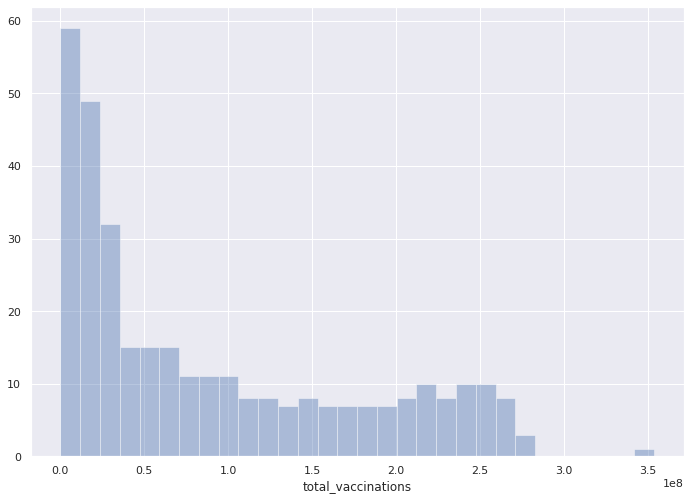

In [ ]:
#Kecenderungan atau rata-rata vaksinasi harian Indonesia
sns.distplot(indo_df['total_vaccinations'],kde=False, bins=30)
plt.pyplot.show()

In [ ]:
indo_df['daily_vaccinations']

33910      13200.0
33912      11892.0
33913      11823.0
33914      21898.0
33915      28915.0
           ...    
34250    1295368.0
34251    1313756.0
34252    1323661.0
34253    1339844.0
34319    1196205.0
Name: daily_vaccinations, Length: 335, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Frekuensi'), Text(0.5, 0, 'Vaccine')]

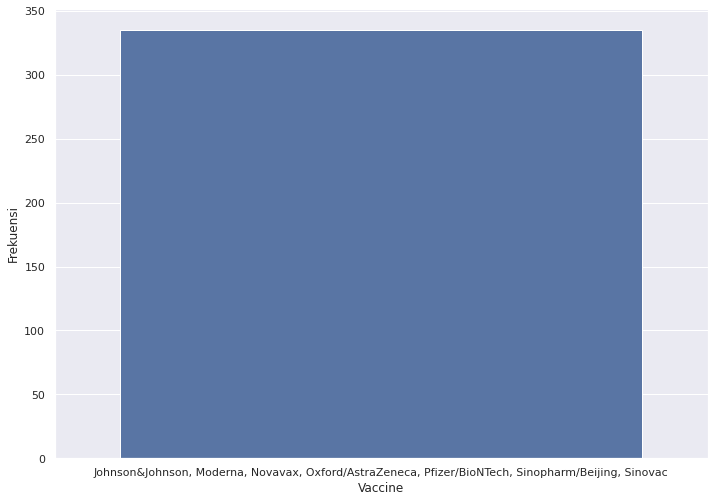

In [ ]:
#Histogram Kategorikal
#Pertanda Indonesia nggak pernah berganti jenis vaksin apa aja yg dia pake
sns.countplot(indo_df['vaccines']).set(xlabel='Vaccine',ylabel='Frekuensi')

[Text(0, 0.5, 'Frekuensi'), Text(0.5, 0, 'Vaccine')]

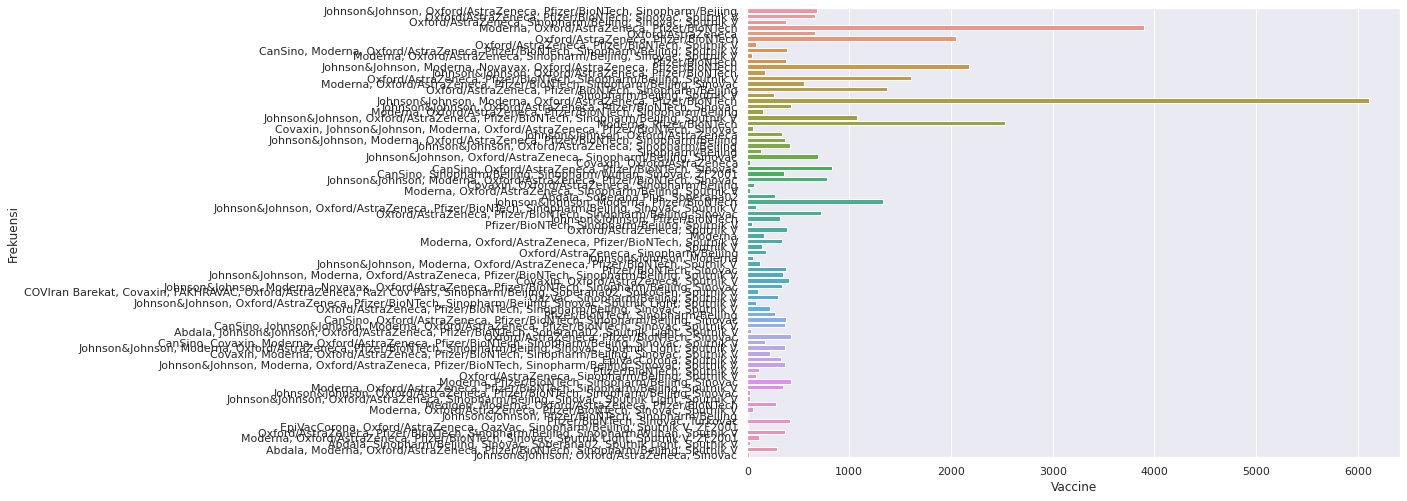

In [ ]:
#Penggunaan Vaksin Dunia
sns.countplot(y = df1['vaccines']).set(xlabel='Vaccine',ylabel='Frekuensi')

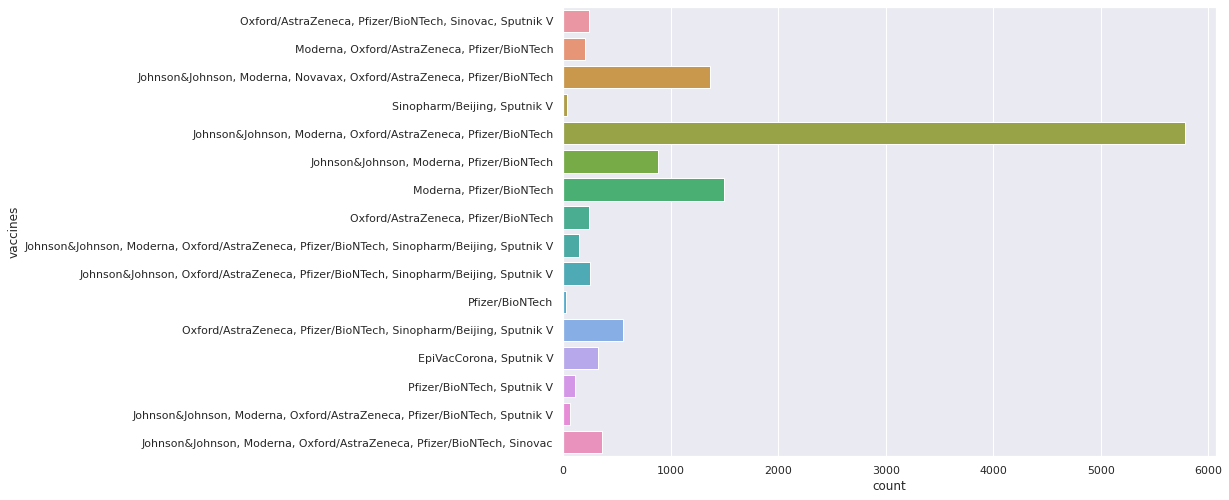

In [ ]:
#Penggunaan Vaksin Eropa
df_eu = df1[df1['continent'] == 'Europe']
sns.countplot(y = df_eu['vaccines'])

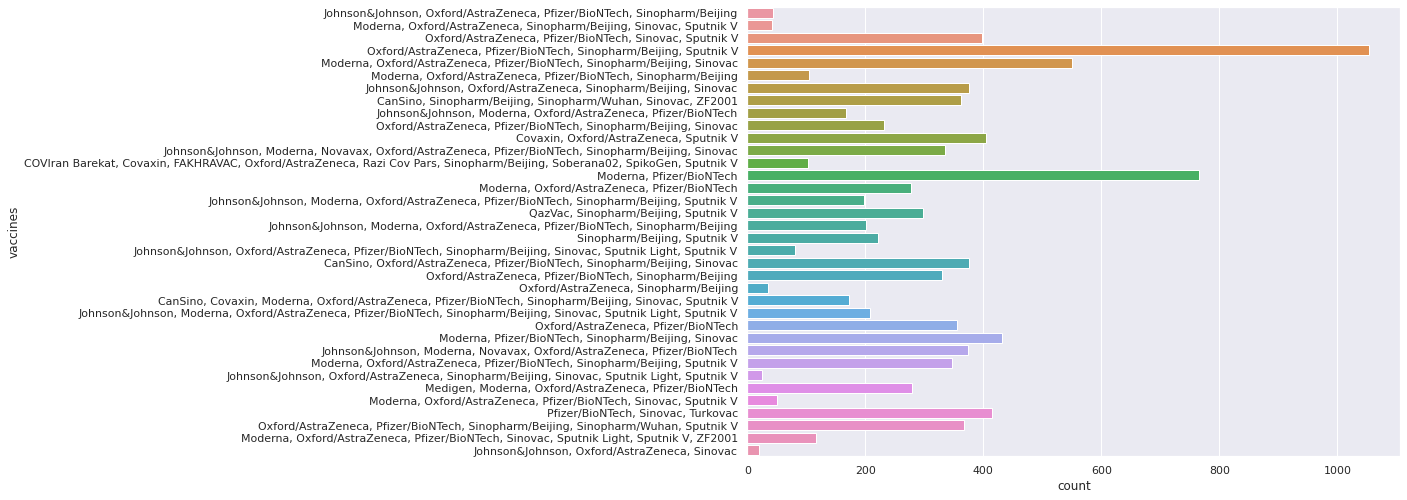

In [ ]:
#Penggunaan Vaksin Asia
df_as= df1[df1['continent'] == 'Asia']
sns.countplot(y = df_as['vaccines'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


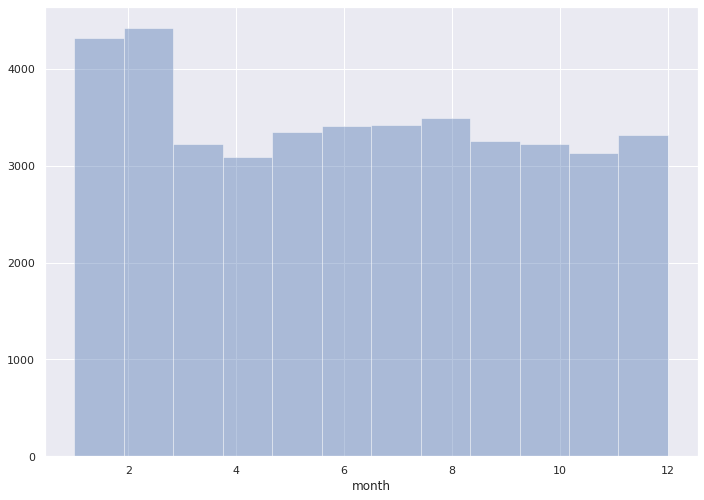

In [ ]:
#Kecenderungan atau rata-rata vaksinasi per tahun
sns.distplot(df1['month'],kde=False, bins = 12)

In [ ]:
df1.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Rate_of_Growth,year,month,day,continent
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.166707,2021,2,28,Asia
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,0.0,0.0,2862.0,0.14,0.14,0.00,72.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.053000,2021,3,16,Asia
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,0.0,0.0,3000.0,0.30,0.30,0.00,75.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.025000,2021,4,7,Asia
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,0.0,0.0,8000.0,0.60,0.60,0.00,201.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.033333,2021,4,22,Asia
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,0.0,13921.0,1.27,1.13,0.14,349.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,0.027594,2021,5,11,Asia


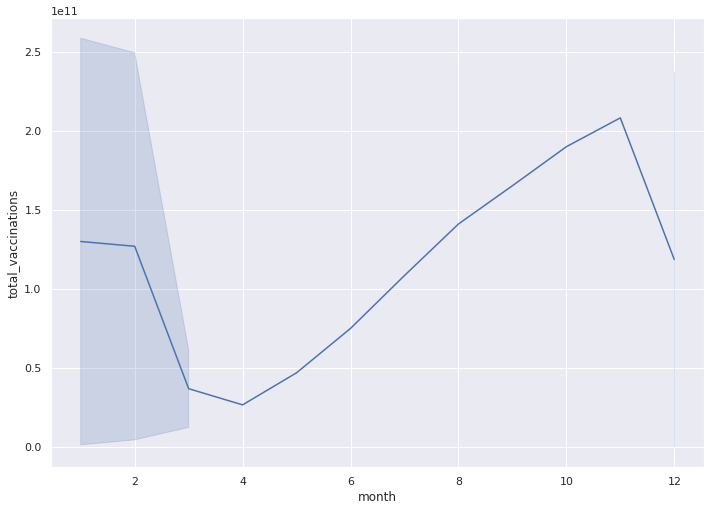

In [ ]:
#Growth of Vaccination by Month
df_temp = df1.iloc[:, [3,16,17]]
temp_line = df_temp.groupby(['year','month'],as_index=False).sum()
sns.lineplot(x = 'month', y = 'total_vaccinations', data = temp_line)

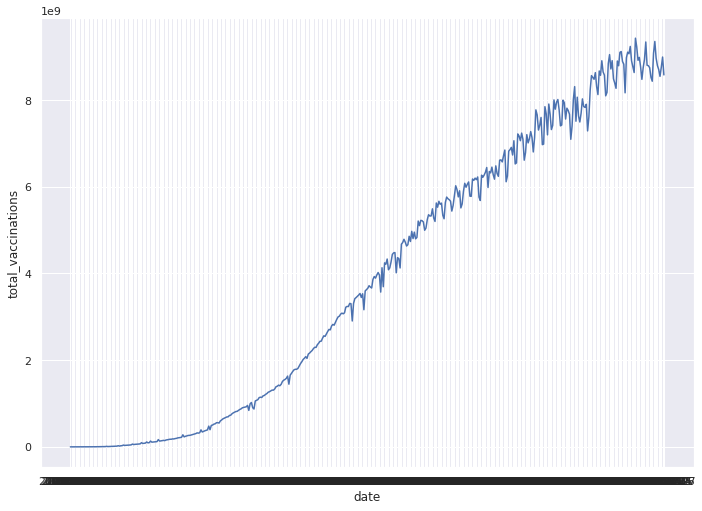

In [ ]:
#Growth of Vaccination by Date
df_date = df1.iloc[:, 2:4]
temp_line_1 = df_date.groupby('date',as_index=False).sum()
sns.lineplot(x = 'date', y = 'total_vaccinations', data = temp_line_1)

Heatmap untuk keseluruhan dataset ini beserta dengan kolom-kolom yang telah dimanipulasi/ditambahkan dapat dilihat pada gambar berikut ini,.

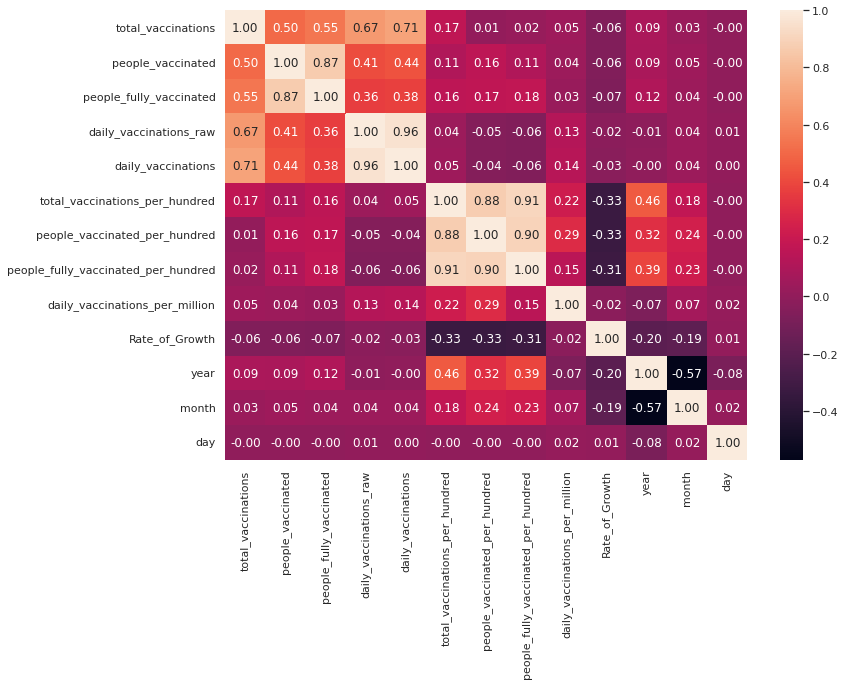

In [ ]:
#Heatmap
corr = df1.corr()
sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.heatmap(corr,annot=True,fmt='.2f')

# Feature Selection

In [ ]:
df1.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'Rate_of_Growth', 'year',
       'month', 'day', 'continent'],
      dtype='object')

Anggap disini model dibuat untuk memprediksi benua berdasarkan beberapa feature yang bersifat numerik dari data. Maka dari itu, feature selection method yang digunakan adalah ANOVA, karena dianggap paling sesuai untuk Input Variable Numerik dan Output Variable Kategorikal.

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [ ]:
df1.isna().sum(axis = 0)

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                   0
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred       0
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
Rate_of_Growth                           18
year                                      0
month                                     0
day                                       0
continent                              6296
dtype: int64

In [ ]:
df1 = df1.dropna()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 197.065455
Feature 1: 143.057485
Feature 2: 110.174462
Feature 3: 208.431874
Feature 4: 232.382877
Feature 5: 483.317421
Feature 6: 478.346032
Feature 7: 394.386397
Feature 8: 249.646454


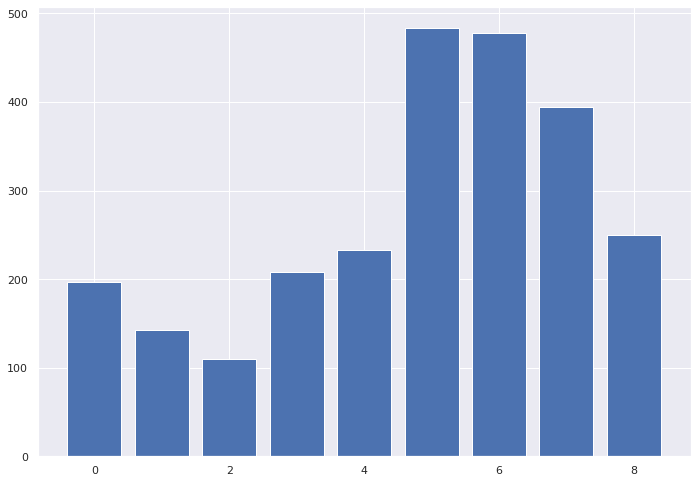

In [ ]:
x = df1[['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]
y = df1[['continent']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)

fs = SelectKBest(score_func=f_classif,k="all")
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Dari seluruh feature yang di-tes, terlihat bahwa feature 5,6,7 memiliki nilai f-test paling baik. F-test sendiri adalah test statistik yang menghitung rasio antara nilai-nilai variansi. Semakin besar nilai f-test suatu fitur, berarti semakin relevan fitur tersebut terhadap tujuan terkait.

Maka dapat diasumsikan bahwa feature 5,6,7 ('total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred')merupakan salah satu feature yang paling baik digunakan untuk memprediksi benua.

# Dimensionality Reduction

Selain feature selection menggunakan ANOVA yg sudah dipraktekkan di atas ataupun PCA yang kemaren dilakukan, sebenarnya tetap ada cara untuk mengurangi kembali feature feature yang akan digunakan dalam modelnya nanti. Salah satu di antaranya adalah Random Forests.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
from sklearn.ensemble import RandomForestRegressor

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df1['country'])

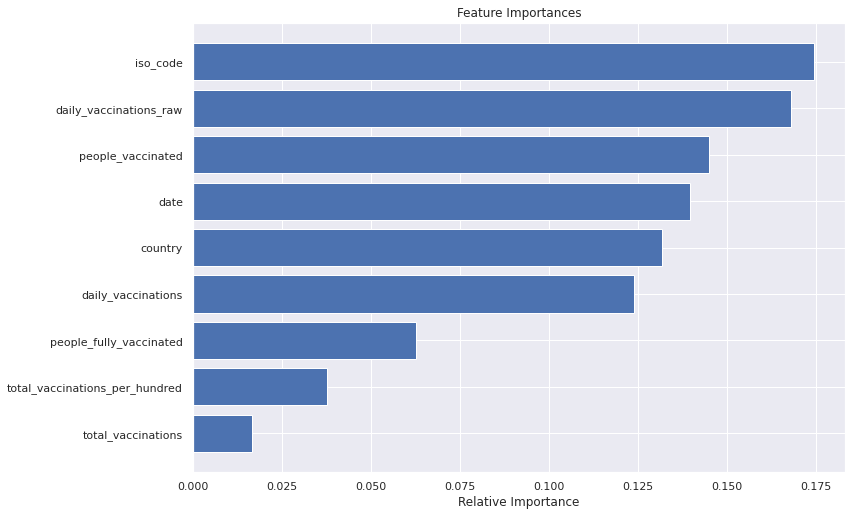

In [ ]:
x = df1[['total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]


model = RandomForestRegressor(random_state=1, max_depth=10)

model.fit(x,y)
#y_coded = encoder.fit_transform(y)
features = df1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)


Ini berarti untuk menentukan nilai kolom negara, maka fitur yang paling berpengaruh atau paling sesuai adalah ISO_Code (jelas,) daily_vaccinations_raw, dll.Fitur selain itu dapat direduksi/dikurangi secara perlahan.

Selain itu, ada juga cara yang dapat digunakan dengan mengkalkulasikan melewati filter Low Variance dan filter High Correlation. Cara melihat variansi dan korelasi adalah:


In [ ]:
df1.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_vaccinations                     5.185763e+16
people_vaccinated                      4.507151e+15
people_fully_vaccinated                2.581810e+15
daily_vaccinations_raw                 1.431252e+12
daily_vaccinations                     1.344754e+12
total_vaccinations_per_hundred         4.342409e+03
people_vaccinated_per_hundred          8.895894e+02
people_fully_vaccinated_per_hundred    8.164246e+02
daily_vaccinations_per_million         1.644898e+07
Rate_of_Growth                         1.942852e-03
year                                   1.373214e-01
month                                  1.247503e+01
day                                    7.777219e+01
dtype: float64

In [ ]:
df1.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Rate_of_Growth,year,month,day
total_vaccinations,1.000000,0.482090,0.526867,0.675914,0.708738,0.166869,-0.005702,0.002839,0.051754,-0.053725,0.091503,0.034282,-0.002491
people_vaccinated,0.482090,1.000000,0.855195,0.411242,0.431134,0.098384,0.149798,0.098735,0.042264,-0.056209,0.087826,0.045965,-0.000866
people_fully_vaccinated,0.526867,0.855195,1.000000,0.363198,0.378718,0.149703,0.155790,0.160533,0.038285,-0.061417,0.119794,0.037100,-0.000067
daily_vaccinations_raw,0.675914,0.411242,0.363198,1.000000,0.962854,0.047053,-0.050245,-0.061552,0.129190,-0.024654,-0.005930,0.042210,0.006475
daily_vaccinations,0.708738,0.431134,0.378718,0.962854,1.000000,0.051576,-0.050508,-0.062773,0.136963,-0.027365,-0.001274,0.044439,0.001825
total_vaccinations_per_hundred,0.166869,0.098384,0.149703,0.047053,0.051576,1.000000,0.873454,0.910372,0.245334,-0.324020,0.452234,0.177431,-0.003131
people_vaccinated_per_hundred,-0.005702,0.149798,0.155790,-0.050245,-0.050508,0.873454,1.000000,0.902236,0.310456,-0.319036,0.313700,0.245732,-0.002040
people_fully_vaccinated_per_hundred,0.002839,0.098735,0.160533,-0.061552,-0.062773,0.910372,0.902236,1.000000,0.173078,-0.308713,0.386662,0.220501,-0.002443
daily_vaccinations_per_million,0.051754,0.042264,0.038285,0.129190,0.136963,0.245334,0.310456,0.173078,1.000000,-0.027254,-0.059059,0.071179,0.014860
Rate_of_Growth,-0.053725,-0.056209,-0.061417,-0.024654,-0.027365,-0.324020,-0.319036,-0.308713,-0.027254,1.000000,-0.201654,-0.191176,0.015721


Dengan adanya pembatas/filter di nilai korelasi tinggi/variansi rendah tertentu, maka seluruh proses yang melibatkan keduanya susah diberi aman dan sepertinya tidak akan sukses.